# Answering Business Questions using SQL

This project will concentrate on answering business questions on the Chinook database, using SQL.

The Chinook database is a sample databse ([here](https://github.com/lerocha/chinook-database)) available for SQL Server, Oracle, MySQL, et. and is ideal for demos. The database is currently provided here as a SQLite databse file called `chinook.db`.

DISCLAIMER: I ONLY DO THIS ANALYSIS FOR AN UNKNOWN SONGS SHOP FOR TRAINING PURPOSE AS A DEMO AND TO SHOW MY SKILLSET. I DO NOT CONDUCT ANALYSIS FOR SONGS SHOP FOR ETHICAL REASONS.

Below is the structure of its tables:

![Chinook Schema](chinook-schema.svg)

We will start with the basic connectivity code to have the results display properly within Jupyter Notebook.

## Connecting to the database

In [1]:
%%capture
%load_ext sql
%sql sqlite:///chinook.db

'Connected: None@chinook.db'

## Exploring Database

Checking the tables list:

In [2]:
%%sql
SELECT
    name,
    type
FROM sqlite_master
WHERE type IN ('table','view');

Done.


name,type
album,table
artist,table
customer,table
employee,table
genre,table
invoice,table
invoice_line,table
media_type,table
playlist,table
playlist_track,table


Exploring the data:

In [3]:
%%sql
SELECT * FROM invoice
LIMIT 5;

Done.


invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
1,18,2017-01-03 00:00:00,627 Broadway,New York,NY,USA,10012-2612,15.84
2,30,2017-01-03 00:00:00,230 Elgin Street,Ottawa,ON,Canada,K2P 1L7,9.9
3,40,2017-01-05 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,1.98
4,18,2017-01-06 00:00:00,627 Broadway,New York,NY,USA,10012-2612,7.92
5,27,2017-01-07 00:00:00,1033 N Park Ave,Tucson,AZ,USA,85719,16.83


In [4]:
%%sql
SELECT * FROM invoice_line
LIMIT 5;

Done.


invoice_line_id,invoice_id,track_id,unit_price,quantity
1,1,1158,0.99,1
2,1,1159,0.99,1
3,1,1160,0.99,1
4,1,1161,0.99,1
5,1,1162,0.99,1


We can see that the `invoice_line` table is detailing the `invoice` table.

In [5]:
%%sql
SELECT * FROM customer
LIMIT 5;

Done.


customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


In [6]:
%%sql
SELECT * FROM employee
LIMIT 5;

Done.


employee_id,last_name,first_name,title,reports_to,birthdate,hire_date,address,city,state,country,postal_code,phone,fax,email
1,Adams,Andrew,General Manager,None,1962-02-18 00:00:00,2016-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
2,Edwards,Nancy,Sales Manager,1,1958-12-08 00:00:00,2016-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2017-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
4,Park,Margaret,Sales Support Agent,2,1947-09-19 00:00:00,2017-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
5,Johnson,Steve,Sales Support Agent,2,1965-03-03 00:00:00,2017-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [19]:
%%sql
select * from track
limit 5;

Done.


track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman",230619,3990994,0.99
4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. Dirkscneider & W. Hoffman",252051,4331779,0.99
5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


We can notice the link between the invoice details and the track tables is the track_id field.

## Deal Choice Analysis
The Chinook record store has just signed a deal with a new record label, and we've been tasked with selecting the first three albums that will be added to the store, from a list of four.

All four albums are by artists that don't have any tracks in the store right now - we have the artist names, and the genre of music they produce:

Artist Name|Genre
---|---
Regal|Hip-Hop
Red one|Punk
Meteor and the Girls|Pop
Slim Jim Bites|Blues

The record label specializes in artists from the USA, and they have given Chinook some money to advertise the new albums in the USA, so we're interested in finding out which genres sell the best in the USA.

In [28]:
%%sql
WITH total_counts AS (
    SELECT g.name, COUNT(il.track_id) count
    FROM invoice_line il
    INNER JOIN track t ON t.track_id = il.track_id
    INNER JOIN genre g ON g.genre_id = t.genre_id
    INNER JOIN invoice i ON i.invoice_id = il.invoice_id
    INNER JOIN customer c ON c.customer_id = i.customer_id
    WHERE c.country = 'USA'
    GROUP BY g.genre_id
)
SELECT
    name,
    count sold_us,
    ROUND(CAST(count AS FLOAT) / (
                                 SELECT SUM(count) FROM total_counts
                                 ) * 100, 2) || ' %' pct
FROM total_counts
where name IN ('Hip Hop/Rap','Alternative & Punk','Pop','Blues')
GROUP BY name
ORDER BY 2 DESC
--LIMIT 10;

Done.


name,sold_us,pct
Alternative & Punk,130,12.37 %
Blues,36,3.43 %
Pop,22,2.09 %
Hip Hop/Rap,20,1.9 %


We can plot a pie chart for the above to visually see the difference.

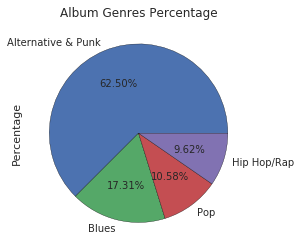

In [30]:
raw_data = {'Album Genres': ['Alternative & Punk', 'Blues','Pop', 'Hip Hop/Rap'],
            'Percentage': [130, 36, 22, 20]}

df_album_prucahse = pd.DataFrame(raw_data, columns=['Album Genres', 'Percentage'])


plt.figure()
ax2 = plt.subplot(aspect='equal')
df_album_prucahse.plot(
    kind='pie', 
    ax=ax2, 
    y='Percentage', 
    labels=df_album_prucahse['Album Genres'], 
    legend=False, 
    autopct='%1.2f%%',
    title='Album Genres Percentage'
)
plt.show()

From the above analysis, it seems that 'Punk' sells the best. 'Pop' and 'Hip Hop' are close to each other, and come after 'Punk. All sell better than 'Blues'.

But 'Blues' only covers about 3.5% of total sales. It is recommeded to go with 'Punk', and the rest are almost yeilding similar results. The above order can be used in priority.

# Employees Performance
Each customer for the Chinook store gets assigned to a sales support agent within the company when they first make a purchase.

We have been asked to analyze the purchases of customers belonging to each employee to see if any sales support agent is performing either better or worse than the others.

We have to put into consedration the experience (relevance column here is `hire_date`).

In [8]:
%%sql
WITH detailed AS (
    SELECT
        c.customer_id,
        c.support_rep_id,
        e.hire_date,
        e.first_name || ' ' || e.last_name name
    FROM customer c
    INNER JOIN employee e ON e.employee_id = c.support_rep_id
)
SELECT
    d.name,
    d.hire_date,
    SUM(i.total) total_sales
FROM invoice i
INNER JOIN detailed d ON d.customer_id = i.customer_id
group by 2

Done.


name,hire_date,total_sales
Jane Peacock,2017-04-01 00:00:00,1731.5100000000039
Margaret Park,2017-05-03 00:00:00,1584.0000000000034
Steve Johnson,2017-10-17 00:00:00,1393.920000000002


From the above, we see that the performance is somewhat relevant to the hire date (time and experience are players). However, there's a difference of about 1 month between the first two employees in the table above.

We can make a simple chart to visualize the difference.

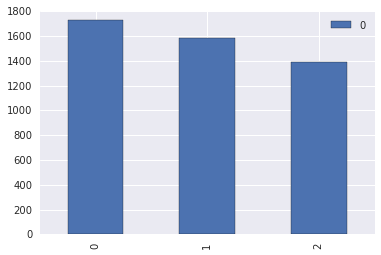

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.DataFrame([1731.5100000000039, 1584.0000000000034, 1393.920000000002])
df.plot(kind='bar')

We can calculate the difference as well between the first two.

In [10]:
df[0][1] / df[0][0] * 100

91.48084619782733

Difference is not much really here, and hiring date can be reason.

# Analyzing Sales Data
We also are required to analyze sales data for customers from each different country (for this task, we have been directed to ignore the billing address country).

for each country, we are going to calculate the following:
1. total number of customers.
2. total value of sales.
3. average value of sales per customer.
4. average order value.

In case if a country has only one customer, we're going to collect them into an 'Other' group.

We create separate calculations:

In [11]:
%%sql
--avg value of sale per customer per country
select
    c.country,
    sum(i.total) / count(distinct c.customer_id) avg_order
from invoice i
inner join customer c on c.customer_id = i.customer_id
group by c.country
order by avg_order desc

Done.


country,avg_order
Czech Republic,136.62000000000003
Ireland,114.83999999999997
Spain,98.01
Chile,97.02000000000001
Portugal,92.56500000000001
India,91.57499999999999
Brazil,85.53600000000002
Germany,83.655
United Kingdom,81.84
Australia,81.18


In [12]:
%%sql
-- avg order value
select
    c.country,
    avg(i.total) avg_order
from invoice i
inner join customer c on c.customer_id = i.customer_id
group by c.country
order by avg_order desc

Done.


country,avg_order
Czech Republic,9.108000000000002
Spain,8.91
Ireland,8.833846153846151
United Kingdom,8.768571428571429
India,8.72142857142857
Belgium,8.627142857142855
Germany,8.161463414634147
Australia,8.118
Norway,8.030000000000001
USA,7.942671755725189


In [13]:
%%sql
-- total value of sale
select c.country, sum(i.total) total_sale from invoice i
inner join customer c on c.customer_id = i.customer_id
group by c.country
order by total_sale desc

Done.


country,total_sale
USA,1040.4899999999998
Canada,535.5900000000001
Brazil,427.68000000000006
France,389.0699999999999
Germany,334.62
Czech Republic,273.24000000000007
United Kingdom,245.52
Portugal,185.13000000000002
India,183.14999999999998
Ireland,114.83999999999997


In [14]:
%%sql
-- total number of customer
select country, 
count(*) count from customer
group by country
order by count desc

Done.


country,count
USA,13
Canada,8
Brazil,5
France,5
Germany,4
United Kingdom,3
Czech Republic,2
India,2
Portugal,2
Argentina,1


Then we join all four, taking care of the 'Other' group:

In [15]:
%%sql
WITH detailed AS (
    select
        c.country cty,
        COUNT(distinct c.customer_id) count,
        SUM(i.total) total_sales,
        AVG(i.total) avg_order_value,
        SUM(i.total) / COUNT(distinct c.customer_id) avg_sales_per_customer,
        CASE
            WHEN count(distinct c.customer_id) = 1 THEN 1
            ELSE 0
            END AS sort
    FROM invoice i
    INNER JOIN customer c on c.customer_id = i.customer_id
    GROUP BY 1
    ORDER BY total_sales DESC
)

SELECT 
    CASE
        WHEN count = 1 THEN 'Other'
        ELSE cty 
        END AS country,
    SUM(count) count,
    SUM(total_sales) total_sales,
    AVG(avg_order_value) avg_order_value,
    AVG(avg_sales_per_customer) avg_sales_per_customer
FROM detailed
GROUP BY 1
ORDER BY sort, total_sales DESC

Done.


country,count,total_sales,avg_order_value,avg_sales_per_customer
USA,13,1040.4899999999998,7.942671755725189,80.0376923076923
Canada,8,535.5900000000001,7.047236842105265,66.94875000000002
Brazil,5,427.68000000000006,7.0111475409836075,85.53600000000002
France,5,389.0699999999999,7.781399999999998,77.81399999999998
Germany,4,334.62,8.161463414634147,83.655
Czech Republic,2,273.24000000000007,9.108000000000002,136.62000000000003
United Kingdom,3,245.52,8.768571428571429,81.84
Portugal,2,185.13000000000002,6.383793103448276,92.56500000000001
India,2,183.14999999999998,8.72142857142857,91.57499999999999
Other,15,1094.9399999999998,7.445071062271063,72.996


From the above, the US sales are the best out of them.

# Final Steps

The Chinook store is setup in a way that allows customer to make purchases in one of the two ways:

1. Purchase a whole album
2. Purchase a collection of one or more individual tracks.

The store does not let customers purchase a whole album, and then add individual tracks to that same purchase (unless they do that by choosing each track manually). When customers purchase albums they are charged the same price as if they had purchased each of those tracks separately.

Management are currently considering changing their purchasing strategy to save money. The strategy they are considering is to purchase only the most popular tracks from each album from record companies, instead of purchasing every track from an album.

We have been asked to find out what percentage of purchases are individual tracks vs whole albums, so that management can use this data to understand the effect this decision might have on overall revenue.

Edge cases to consider:

1. Albums that have only one or two tracks are likely to be purchased by customers as part of a collection of individual tracks.
2. Customers may decide to manually select every track from an album, and then add a few individual tracks from other albums to their purchase.

In the first case, since our analysis is concerned with maximizing revenue, we can safely ignore albums consisting of only a few tracks. The company has previously done analysis to confirm that the second case does not happen often, so we can ignore this case also.

In [16]:
%%sql
with detailed as (
    select il.invoice_id, il.track_id, t.album_id from invoice_line il
    inner join track t on t.track_id = il.track_id
),

tf as (
    select 
        case
            when (
                select t.track_id from track t
                where dt.album_id = t.album_id
                except
                select il.track_id from invoice_line il
                where dt.invoice_id = il.invoice_id
            ) IS NULL
            AND
            (
                select il.track_id from invoice_line il
                where dt.invoice_id = il.invoice_id
                except
                select t.track_id from track t
                where dt.album_id = t.album_id
            ) IS NULL
            THEN 'Yes'
            ELSE 'No'
            END AS tf
from detailed dt
group by dt.invoice_id
)

select 
    tf whole_album_pruchase,
    count(tf) count,
    ROUND(cast(count(tf) as float) / (select count(*) from invoice) * 100, 2) || '%' pct

from tf
group by tf

Done.


whole_album_pruchase,count,pct
No,500,81.43%
Yes,114,18.57%


Plotting the results:

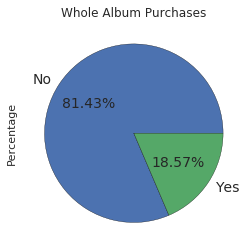

In [17]:
raw_data = {'Whole Album Purchases': ['No', 'Yes'],
            'Percentage': [81.43,18.57]}

df_album_prucahse = pd.DataFrame(raw_data, columns=['Whole Album Purchases', 'Percentage'])


plt.figure()
ax2 = plt.subplot(aspect='equal')
df_album_prucahse.plot(
    kind='pie', 
    ax=ax2, 
    y='Percentage', 
    labels=df_album_prucahse['Whole Album Purchases'], 
    legend=False, 
    fontsize=14, 
    autopct='%1.2f%%',
    title='Whole Album Purchases'
)
plt.show()

From the above results, album pruchases resembles about 1/5th of the pruchases. This guides the management to not go with the considered strategy since it can cause the loss of 1/5th of the revenue.

# Thank you
comments are welcome on [ha.hashem@outlook.com](mailto:ha.hashem@outlook.com)